# Data visualization
$\textbf{Group 70: Prakash Srinivasan (s4065905), Jim van Veenhuyzen (s2272881), Ryan van der Werf (s2331233)}$

## Introduction
In this notebook we aim to visualise our data obtained from the matrix factorization algorithms in the other notebook. More specifically, we use the feature matrices for both the users and movies. The user and movie matrices are $U$ and $V$ & $U$ and $M$ for the $\textbf{UV decomposition}$ and the $\textbf{Matrix Factorization}$ respectively. 

## Approach
Our approach for the data visualition will be first to apply the dimensionality reduction techniques on one of each of the feature matrices we obtained from the matrix factorization algorithms, so for a user matrix $\textbf{U}$ and a movie matrix $\textbf{M}$. From this, we will 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import umap

In [2]:
#First read in the MovieLens 1M data

usersData = pd.read_csv('users.dat', sep='::', header=None, \
                        names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], engine='python')
ratingsData = pd.read_csv('ratings.dat', sep='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python')
moviesData = pd.read_csv('movies.dat', sep='::', header=None, \
                         names=['MovieID', 'Title', 'Genres'], engine='python', encoding='latin1')

Lets first inspect how the user and movie data looks so we can identify which features belong to the users and movies.

In [3]:
usersData.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


We can see that the relevant features for the users are the user's $\textit{gender}$, $\textit{age}$ and $\textit{occupation}$. 

In [4]:
moviesData.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


We can see that the relevant features for the movies are the movie's $\textit{title}$ and $\textit{genres}$, but from the $\textit{title}$ the $\textit{year}$ of release is the most interesting to look at, and the $\textit{genre}$ features encompasses various genres. Next, we load in the feature matrices generated from the UV-decomposition and Matrix Factorization algorithms. For both the UV-decomposition and the matrix decomposition algorithms, we applied 5-fold cross validation, which means we have 5 user-feature matrices $U$ and 5 movie-feature matrices $V$ respectively for both methods. As it is inconvenient to use all 20 of these matrices for the visualisation, we instead pick just one of the $U$ and $V$ matrices for each method. The difference in RMSE values between folds is tiny, so we decide to use the matrices from the first fold, but again which one is used seems trivial. Next to the matrices, we also import a list of user and movie IDs from the training sets used. This is because if we split the total data into smaller parts, there is no guarantee that we retain all different users and movies: it can occur that we do not include any of the ratings given by some user $i$ or any of the ratings given for some movie $j$.  

In [5]:
#Import the feature matrices obtained from the UV-decomposition algorithm using d=5 (1st fold)
U_uvdecomp = np.load('U_d5_fold1.npy')
V_uvdecomp = np.load('V_d5_fold1.npy')
users = np.load('userID_fold1.npy') 
movies = np.load('movieID_fold1.npy')

#The UV-decomposition algorithm results using d=10 (1st fold)
U_uvdecomp_d10 = np.load('U_d10_fold1.npy')
V_uvdecomp_d10 = np.load('V_d10_fold1.npy')

In [6]:
#Import the feature matrices obtained from the Matrix Factorization algorithm using num_factors=10 (1st fold)
U_matrixfac = np.load('predicted_U_1.npy')
V_matrixfac = np.load('predicted_M_1.npy')

Lets view the header of one of the feature matrices we generated, for example the U-matrix generated by 
the Matrix Decomposition algorithm using num_factors=10. This means there are 10 user-features for each user.

In [7]:
print('The size of the U-matrix is:',U_matrixfac.shape)

user_features = np.arange(1,11,1) #num_factors=10 was used, so there are 10 user-features
df_U_matrixfac = pd.DataFrame(data=U_matrixfac,index=users, columns=user_features)
df_U_matrixfac.head()

The size of the U-matrix is: (6036, 10)


,1,2,3,4,5,6,7,8,9,10
1,0.860823,0.190604,0.268035,0.863651,0.632721,0.535228,0.208387,0.725279,0.646824,0.905409
2,0.233199,0.442093,0.271232,0.844727,0.882524,-0.100023,0.714339,0.921956,-0.002386,0.898872
3,1.061206,0.912620,1.189597,0.871939,0.345037,-0.297734,0.507672,0.840903,-0.154345,0.412239
4,1.311179,0.589009,0.383098,0.140379,0.262039,0.787067,0.357429,0.969267,0.575986,0.769088
5,0.017798,0.368527,0.424269,0.093695,0.729064,1.347575,0.553867,0.083483,0.639838,-0.148672


Interestingly we are missing a tiny number of users, as the total amount of user IDs is 6040. This is a general trend for all feature matrices, which also means this applies to the movie feature matrices also. Therefore, we apply a mask using the userID and movieID data we saved during the matrix factorization algorithms, so that we can match which users and movies are present in our feature matrices. 

Now that we've imported the data, lets apply the dimensionality reduction techniques to reduce the dimensionality to 2. We decide to use $\textbf{PCA}$ and $\textbf{UMAP}$ here, as the visual difference between $\textbf{t-SNE}$ and $\textbf{UMAP}$ is minimal in this case. We chose to use PCA once to plot the data to showcase its inferiority compared to using UMAP. For now, we will analyse the user matrix $U$ from the $\textbf{Matrix Factorization}$. For the user data, the main areas of interest are the $\textit{gender}$, $\textit{age}$ and $\textit{occupation}$ of the user. The following code inspects whether there is any clustering for the $\textit{genders}$ and $\textit{ages}$ of the users. 

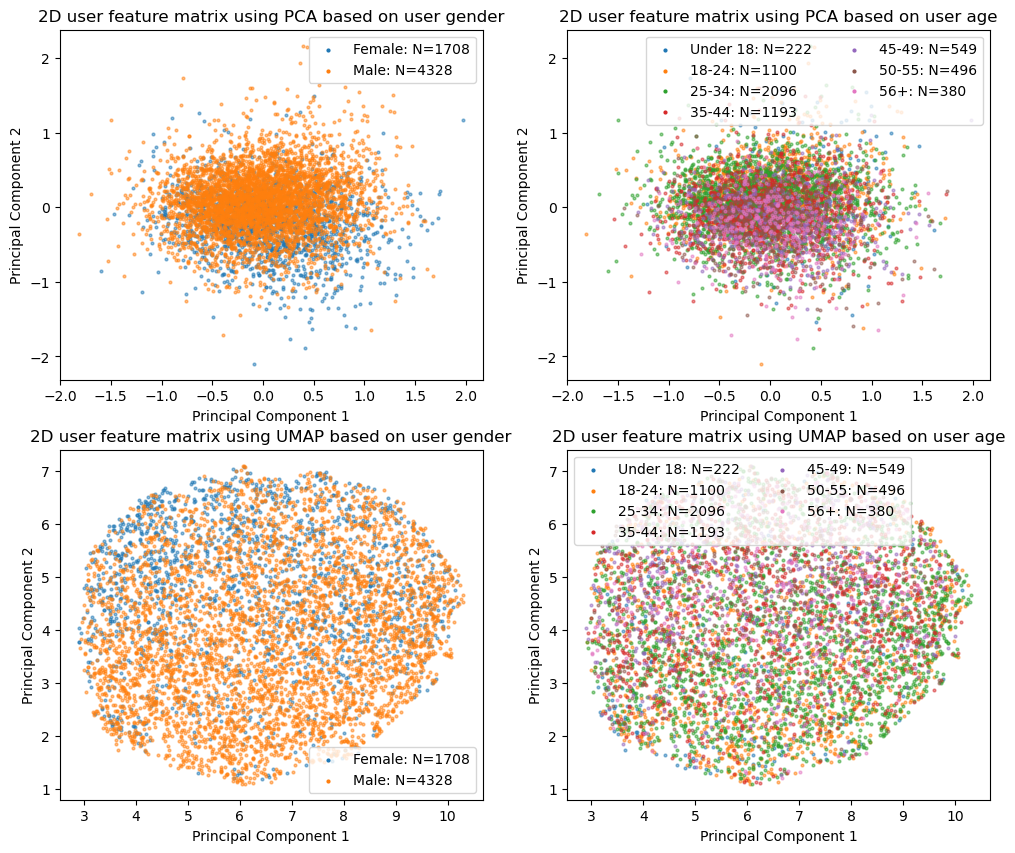

In [8]:
#Obtain the user data in the Gender and Age columns
U_matrixfac_user = usersData[usersData['UserID'].isin(users)]

#Define the genders and corresponding labels
U_matrixfac_gender = U_matrixfac_user['Gender']
labels_gender = ['Female','Male']

#Define the ages and corresponding labels
U_matrixfac_age = U_matrixfac_user['Age']
labels_age = ["Under 18","18-24","25-34","35-44","45-49","50-55","56+"]

#Apply the PCA on the U-matrix, reducing the number of user-features and thus the amount of columns to 2
pca_U_matrixfac = PCA(n_components=2)
pca_data_U_matrixfac = pca_U_matrixfac.fit_transform(U_matrixfac)

#Apply UMAP on the U-matrix
umap_U_matrixfac = umap.UMAP(n_components=2)
umap_data_U_matrixfac = umap_U_matrixfac.fit_transform(U_matrixfac)

#Visualise the clustering based on gender based on PCA
fig, ax = plt.subplots(2,2,figsize=(12,10))
label_index = 0
s = 0
for i in np.unique(U_matrixfac_gender):
    indices = np.where(U_matrixfac_gender == i)
    
    num_movies = len(indices[0]) #obtain the number of movies 
    labels_gender[label_index] = str(labels_gender[label_index])+': N='+str(num_movies) #add number of movies to the labels
    ax[0,0].scatter(pca_data_U_matrixfac[:,0][indices], pca_data_U_matrixfac[:,1][indices],\
                    s=4,alpha=0.5,label=labels_gender[label_index])
    label_index += 1
    
leg = ax[0,0].legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax[0,0].set_title('2D user feature matrix using PCA based on user gender')
ax[0,0].set_xlabel('Principal Component 1')
ax[0,0].set_ylabel('Principal Component 2')

#Visualise the clustering based on ages based on PCA
label_index = 0 
for i in np.unique(U_matrixfac_age):
    indices = np.where(U_matrixfac_age == i)
    
    num_movies = len(indices[0]) #obtain the number of movies 
    labels_age[label_index] = str(labels_age[label_index])+': N='+str(num_movies) #add number of movies to the labels
    ax[0,1].scatter(pca_data_U_matrixfac[:,0][indices], pca_data_U_matrixfac[:,1][indices],\
                    s=4,alpha=0.5,label=labels_age[label_index])
    label_index += 1
leg = ax[0,1].legend(ncol=2)
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax[0,1].set_title('2D user feature matrix using PCA based on user age')
ax[0,1].set_xlabel('Principal Component 1')
ax[0,1].set_ylabel('Principal Component 2')

labels_gender = ['Female','Male']
labels_age = ["Under 18","18-24","25-34","35-44","45-49","50-55","56+"]

#Visualise the clustering based on gender based on UMAP
label_index = 0
for i in np.unique(U_matrixfac_gender):
    indices = np.where(U_matrixfac_gender == i)
    
    num_movies = len(indices[0]) #obtain the number of movies 
    labels_gender[label_index] = str(labels_gender[label_index])+': N='+str(num_movies) #add number of movies to the labels
    ax[1,0].scatter(umap_data_U_matrixfac[:,0][indices], umap_data_U_matrixfac[:,1][indices],\
                    s=4,alpha=0.5,label=labels_gender[label_index])
    label_index += 1
leg = ax[1,0].legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax[1,0].set_title('2D user feature matrix using UMAP based on user gender')
ax[1,0].set_xlabel('Principal Component 1')
ax[1,0].set_ylabel('Principal Component 2')

#Visualise the clustering based on ages based on UMAP
label_index = 0 
for i in np.unique(U_matrixfac_age):
    indices = np.where(U_matrixfac_age == i)
    
    num_movies = len(indices[0]) #obtain the number of movies 
    labels_age[label_index] = str(labels_age[label_index])+': N='+str(num_movies) #add number of movies to the labels
    ax[1,1].scatter(umap_data_U_matrixfac[:,0][indices], umap_data_U_matrixfac[:,1][indices],\
                    s=4,alpha=0.5,label=labels_age[label_index])
    label_index += 1
leg = ax[1,1].legend(ncol=2,loc='upper left')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax[1,1].set_title('2D user feature matrix using UMAP based on user age')
ax[1,1].set_xlabel('Principal Component 1')
ax[1,1].set_ylabel('Principal Component 2')
plt.show()

## Interpretation of the results
From these plots, we can already see some non-trivial clustering the data, especially in the bottom two plots created using UMAP. In the bottom left plot based on user gender, we can see that $\textit{male}$ users tend to cluster together at the bottom of the plot, with almost no $\textit{female}$ users present at this location. The $\textit{female}$ users on the other hand are clustered together on the top left. Due to there being significantly more $\textit{male}$ users, there are still some $\textit{male}$ users mixed in with the $\textit{female}$ user cluster however. These results suggest that gender does play a part in the rating behaviour of a user. 

For the visualisation of the user-matrix based on user age, we can also see some clear signs of clustering of older and younger users: the density of green and orange points ($\textit{young}$) is clearly larger at the bottom compared to the top, where there are significantly more red/purple/brown/pink points ($\textit{old}$). Again, age seems to play a relevant part to the ratings users tend to give movies. Lets make this slightly more apparent by only reducing the ages to two separate classifications: under the age of 35 & the age of 35 and above. 

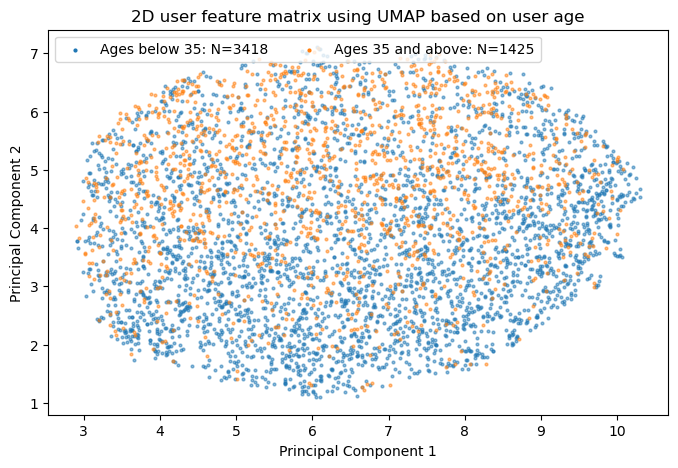

In [9]:
#Define the ages and corresponding labels
U_matrixfac_age = U_matrixfac_user['Age']
labels_age = ["Under 18","18-24","25-34","35-44","45-49","50-55","56+"]
ranges_age = [1,35,56]

#Visualise the clustering based on ages based on UMAP
fig, ax = plt.subplots(figsize=(8,5))
indices_young = np.where((35 > U_matrixfac_age) & (U_matrixfac_age>= 1))
indices_old = np.where(35 < U_matrixfac_age)

num_movies_young = len(indices_young[0])
num_movies_old = len(indices_old[0]) 
ax.scatter(umap_data_U_matrixfac[:,0][indices_young], umap_data_U_matrixfac[:,1][indices_young],\
                    s=4,alpha=0.5,label='Ages below 35: N='+str(num_movies_young))
ax.scatter(umap_data_U_matrixfac[:,0][indices_old], umap_data_U_matrixfac[:,1][indices_old],\
                    s=4,alpha=0.5,label='Ages 35 and above: N='+str(num_movies_old))

leg = ax.legend(ncol=2,loc='upper left')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax.set_title('2D user feature matrix using UMAP based on user age')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()

From the plot above, we do see that the older ages tend to cluster more towards the top half of the plot. Next we will do the same for the movie feature matrix $V$, again using $\textbf{UMAP}$. This time, we use the year of release and genre as main features to visualise the matrix. 

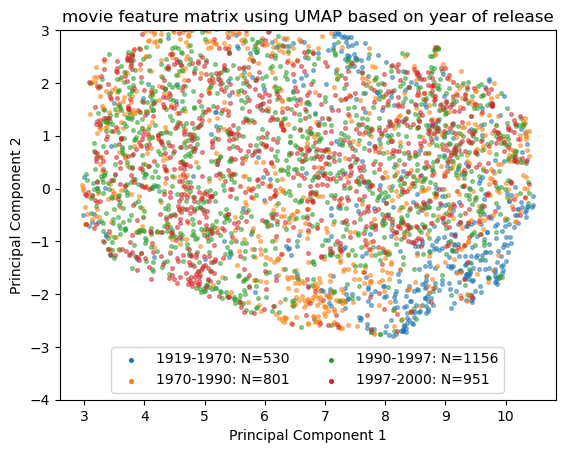

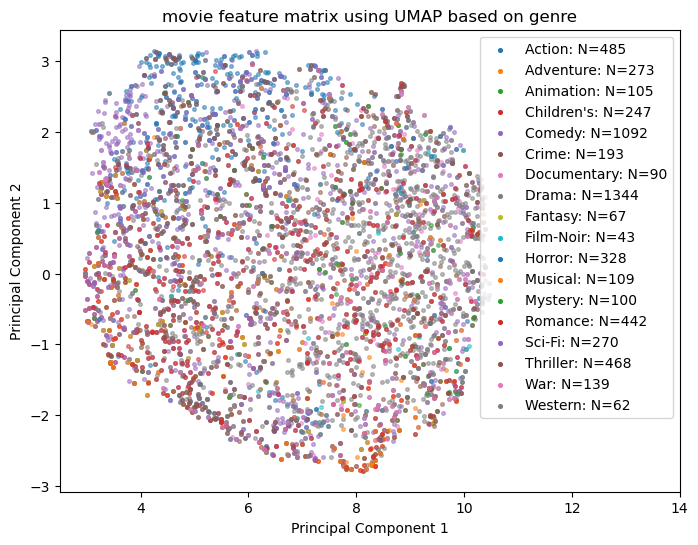

In [10]:
#Obtain the movie attributes
V_matrixfac_movies = moviesData[moviesData['MovieID'].isin(movies)]

#Define the years the movies were released and corresponding labels
years = V_matrixfac_movies['Title'].str.extract('\((\d{4})\)',expand=False).astype(int)
labels_year = ['1919-1970','1970-1990','1990-1997','1997-2000']
ranges_year = [1919,1970,1990,1997,2000]

#Define the genres of the movies and corresponding labels
genre = V_matrixfac_movies['Genres']
labels_genre = ['Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama',\
               'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

#Apply the UMAP on the U-matrix, reducing the number of user-features and thus the amount of columns to 2
umap_V_matrixfac = umap.UMAP(n_components=2)
umap_data_V_matrixfac = umap_V_matrixfac.fit_transform(V_matrixfac)

#Visualise the clustering based on year of release 
fig, ax = plt.subplots()
for i in range(len(labels_year)):
    #Obtain the indices corresponding to various release year ranges
    if i != len(labels_year)-1:
        indices = np.where( (ranges_year[i+1] > years) & (years >= ranges_year[i]) ) #get all indices between 2 years
    else:
        indices = np.where( (years >= ranges_year[i]) ) #get all indices of the most recently released movies
        
    num_movies = len(indices[0]) #obtain the number of movies 
    labels_year[i] = str(labels_year[i])+': N='+str(num_movies) #add number of movies to the labels
    ax.scatter(umap_data_V_matrixfac[:,0][indices], umap_data_V_matrixfac[:,1][indices],\
               s=7,alpha=0.5,label=labels_year[i])
    
leg = ax.legend(ncol=2,loc='lower center')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax.set_title('movie feature matrix using UMAP based on year of release')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_ylim([-4,3])
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
for i in range(len(labels_genre)):
    #Obtain the indices corresponding to various movie ranges
    genre_indices = np.char.find(list(genre),labels_genre[i])
    indices = np.where(genre_indices != -1)
        
    num_movies = len(indices[0]) #obtain the number of movies 
    labels_genre[i] = str(labels_genre[i])+': N='+str(num_movies) #add number of movies to the labels
    ax.scatter(umap_data_V_matrixfac[:,0][indices], umap_data_V_matrixfac[:,1][indices],\
               s=7,alpha=0.5,label=labels_genre[i])
    
leg = ax.legend(ncol=1,loc='upper right')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax.set_title('movie feature matrix using UMAP based on genre')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_xlim([2.5,14])
plt.show()

For the release year feature, we can only spot some clustering for the oldest movies: those released between 1919 and 1970. The rest of the data seems to be rather randomly distributed however. Plotting all the genres makes the clustering challenging to identify, so in order to identify some clusterings, lets make two separate plots in which we compare two sets of genres:

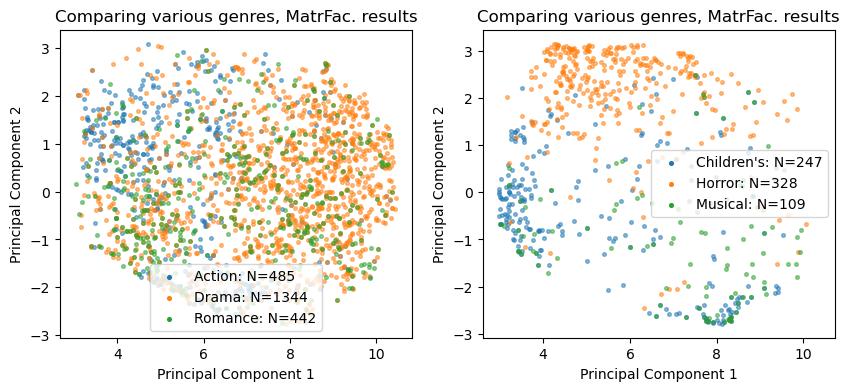

In [11]:
#Define the years the movies were released and corresponding labels
years = V_matrixfac_movies['Title'].str.extract('\((\d{4})\)',expand=False).astype(int)

labels_genre = ['Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama',\
               'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
labels_genre_set1 = ['Action','Drama','Romance']
fig, ax = plt.subplots(1,2,figsize=(10,4))
for i in range(len(labels_genre_set1)):
    #Obtain the indices corresponding to various movie ranges
    genre_indices = np.char.find(list(genre),labels_genre_set1[i])
    indices = np.where(genre_indices != -1)
        
    num_movies = len(indices[0]) #obtain the number of movies 
    labels_genre_set1[i] = str(labels_genre_set1[i])+': N='+str(num_movies) #add number of movies to the labels
    ax[0].scatter(umap_data_V_matrixfac[:,0][indices], umap_data_V_matrixfac[:,1][indices],\
               s=7,alpha=0.5,label=labels_genre_set1[i])
    
leg = ax[0].legend(ncol=1,loc='lower center')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax[0].set_title('Comparing various genres, MatrFac. results')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

labels_genre_set2 = ["Children's",'Horror','Musical']
for i in range(len(labels_genre_set2)):
    #Obtain the indices corresponding to various movie ranges
    genre_indices = np.char.find(list(genre),labels_genre_set2[i])
    indices = np.where(genre_indices != -1)
        
    num_movies = len(indices[0]) #obtain the number of movies 
    labels_genre_set2[i] = str(labels_genre_set2[i])+': N='+str(num_movies) #add number of movies to the labels
    ax[1].scatter(umap_data_V_matrixfac[:,0][indices], umap_data_V_matrixfac[:,1][indices],\
               s=7,alpha=0.5,label=labels_genre_set2[i])
    
leg = ax[1].legend(ncol=1,loc='center right')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax[1].set_title('Comparing various genres, MatrFac. results')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
plt.show()

As we can see in the plots above, the clustering is much more present. In the left image, we can see that the Romance and Drama genre combo clusters together significantly, while the Action genre is only clustered together with its own genre. This result is expected, as Romance and Drama are two genres that are very often combined for movies. The right image also shows a nice, clear separation between two genres that are essentially polar opposites in the context of movies: Children and Horror movies. 

Finally we have not plotted any of the $\textbf{UV-decomposition}$ algorithm results yet, so lets plot the same genre comparison as the one above, but this time using the user and movie feature-matrices generated by the $\textbf{UV-decomposition}$, $U'$ and $V'$ respectively. 

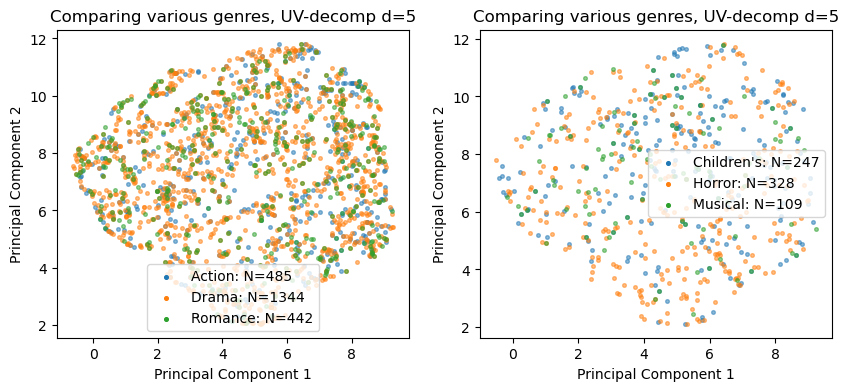

In [12]:
#Obtain the movie attributes
V_uvdecomp_movies = moviesData[moviesData['MovieID'].isin(movies)]

#Define the years the movies were released and corresponding labels
years = V_uvdecomp_movies['Title'].str.extract('\((\d{4})\)',expand=False).astype(int)

#Define the genres of the movies and corresponding labels
genre = V_uvdecomp_movies['Genres']
labels_genre = ['Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama',\
               'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

#Apply the UMAP on the U-matrix, reducing the number of user-features and thus the amount of columns to 2
umap_V_uvdecomp = umap.UMAP(n_components=2)
umap_data_V_uvdecomp = umap_V_uvdecomp.fit_transform(np.transpose(V_uvdecomp))


labels_genre_set1 = ['Action','Drama','Romance']
fig, ax = plt.subplots(1,2,figsize=(10,4))
for i in range(len(labels_genre_set1)):
    #Obtain the indices corresponding to various movie ranges
    genre_indices = np.char.find(list(genre),labels_genre_set1[i])
    indices = np.where(genre_indices != -1)
        
    num_movies = len(indices[0]) #obtain the number of movies 
    labels_genre_set1[i] = str(labels_genre_set1[i])+': N='+str(num_movies) #add number of movies to the labels
    ax[0].scatter(umap_data_V_uvdecomp[:,0][indices], umap_data_V_uvdecomp[:,1][indices],\
               s=7,alpha=0.5,label=labels_genre_set1[i])
    
leg = ax[0].legend(ncol=1,loc='lower center')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax[0].set_title('Comparing various genres, UV-decomp d=5')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

labels_genre_set2 = ["Children's",'Horror','Musical']
for i in range(len(labels_genre_set2)):
    #Obtain the indices corresponding to various movie ranges
    genre_indices = np.char.find(list(genre),labels_genre_set2[i])
    indices = np.where(genre_indices != -1)
        
    num_movies = len(indices[0]) #obtain the number of movies 
    labels_genre_set2[i] = str(labels_genre_set2[i])+': N='+str(num_movies) #add number of movies to the labels
    ax[1].scatter(umap_data_V_uvdecomp[:,0][indices], umap_data_V_uvdecomp[:,1][indices],\
               s=7,alpha=0.5,label=labels_genre_set2[i])
    
leg = ax[1].legend(ncol=1,loc='center right')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax[1].set_title('Comparing various genres, UV-decomp d=5')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
plt.show()

Comparison these two plots with the plots generated using the result from the $\textbf{Matrix Factorization}$, we can see that there is a clear difference: the degree to which the data clusters for the results using $\textbf{UV-decomposition}$ is significantly lower. The distribution of the data points seems a lot more random than the results previously obtained. This is not a surprising result, as the $\textbf{Matrix Factorization}$ algorithm is a much more sophisticated method of decomposing the utility matrix. We are using a smaller axis for the $\textbf{UV-decomposition}$ however, using $d$ = 5, while the short axis of the matrices from the $\textbf{Matrix Factorization}$ have size 10. In order to test whether the results of the $\textbf{UV-decomposition}$ would improve by using matrices with larger axis, we also ran the $\textbf{UV-decomposition}$ using $d$ = 10. We plot this result below, from which we can deduce that the lack of clustering does not seem to improve much by using a larger axis.

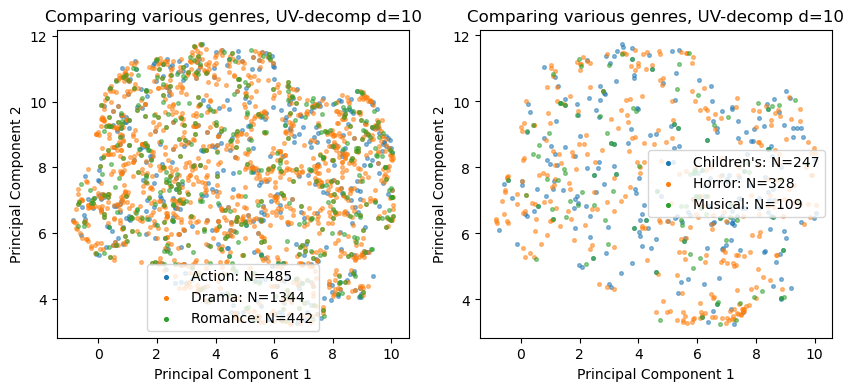

In [13]:
#Obtain the movie attributes
V_uvdecomp_movies = moviesData[moviesData['MovieID'].isin(movies)]

#Define the years the movies were released and corresponding labels
years = V_uvdecomp_movies['Title'].str.extract('\((\d{4})\)',expand=False).astype(int)

#Define the genres of the movies and corresponding labels
genre = V_uvdecomp_movies['Genres']
labels_genre = ['Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama',\
               'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

#Apply the UMAP on the U-matrix, reducing the number of user-features and thus the amount of columns to 2
umap_V_uvdecomp = umap.UMAP(n_components=2)
umap_data_V_uvdecomp = umap_V_uvdecomp.fit_transform(np.transpose(V_uvdecomp_d10))


labels_genre_set1 = ['Action','Drama','Romance']
fig, ax = plt.subplots(1,2,figsize=(10,4))
for i in range(len(labels_genre_set1)):
    #Obtain the indices corresponding to various movie ranges
    genre_indices = np.char.find(list(genre),labels_genre_set1[i])
    indices = np.where(genre_indices != -1)
        
    num_movies = len(indices[0]) #obtain the number of movies 
    labels_genre_set1[i] = str(labels_genre_set1[i])+': N='+str(num_movies) #add number of movies to the labels
    ax[0].scatter(umap_data_V_uvdecomp[:,0][indices], umap_data_V_uvdecomp[:,1][indices],\
               s=7,alpha=0.5,label=labels_genre_set1[i])
    
leg = ax[0].legend(ncol=1,loc='lower center')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax[0].set_title('Comparing various genres, UV-decomp d=10')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

labels_genre_set2 = ["Children's",'Horror','Musical']
for i in range(len(labels_genre_set2)):
    #Obtain the indices corresponding to various movie ranges
    genre_indices = np.char.find(list(genre),labels_genre_set2[i])
    indices = np.where(genre_indices != -1)
        
    num_movies = len(indices[0]) #obtain the number of movies 
    labels_genre_set2[i] = str(labels_genre_set2[i])+': N='+str(num_movies) #add number of movies to the labels
    ax[1].scatter(umap_data_V_uvdecomp[:,0][indices], umap_data_V_uvdecomp[:,1][indices],\
               s=7,alpha=0.5,label=labels_genre_set2[i])
    
leg = ax[1].legend(ncol=1,loc='center right')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax[1].set_title('Comparing various genres, UV-decomp d=10')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
plt.show()

## Conclusion
To summarize our results, there appears to be visible clustering present in multiple of the features for both the users and movies, granted we chose to compare the right catagories. More specficially, if we wish to compare genres, it is critical to pick genres that are either paired together often for movies, or polar opposites. Doing so allows for solid distinction between the various sub-features (genres). Reducing the amount of age catagories to two also helped in visualizing a clear difference between the age groups. For the gender and release year differences, the clustering seems to be less significant, but that could also be due to the choice of our year-ranges. Experimenting with this further could perhaps uncover better clustering in this regard. We also compared visualization of the results of the $\textbf{Matrix Factorization}$ and the $\textbf{UV-decomposition}$ algorithms, from which we can conclude that the $\textbf{Matrix Factorization}$ algorithm results depict a much clearer picture of data clustering. Finally, we tried increasing the axis size of the $\textbf{UV-decomposition}$ to match the one used for the $\textbf{Matrix Factorization}$ algorithm, but this did not improve the clustering by a significant amount.